***3. K-Means - Clustering of Football Clubs:*** You are given a dataset containing football player information. The objective is to cluster different football clubs based on various attributes.

**(a)** Your initial step should be extracting the club information from the player dataset.
It will involve computing the “average player” of each club. One way is to group the dataset by “club name id” and calculate the mean values for all relevant features. You are encouraged to explore different ideas.

**(b)** Now, use K-Means to cluster the football clubs. You can determine the criteria for clustering by considering various features. For example - First try clustering using alL features, after that try again using only features representing player stats or financial attributes.

**(c)** To find the optimal number of clusters, K, you can use the elbow method.

In [ ]:
import csv
def load_data(filename):
    dataset = []
    csvfile = open(filename, newline = '')
    reader = csv.reader(csvfile)
    for i in reader:
        dataset.append(i)
    return dataset

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.evaluate import bias_variance_decomp

path_link = "/content/drive/MyDrive/ML_assignment/football.csv"
dataframe = pd.read_csv(path_link)
dataframe.head()

,sofifa_id,short_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,...,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,contribution_type
0,158023,L. Messi,93,93,78000000.0,320000.0,34,170,72,73.0,...,20,35,24,6,11,15,14,8,NaN,1
1,188545,R. Lewandowski,92,92,119500000.0,270000.0,32,185,81,21.0,...,35,42,19,15,6,12,8,10,NaN,1
2,20801,Cristiano Ronaldo,91,91,45000000.0,270000.0,36,187,83,11.0,...,24,32,24,7,11,15,14,11,NaN,1
3,190871,Neymar Jr,91,91,129000000.0,270000.0,29,175,68,73.0,...,35,32,29,9,9,15,15,11,NaN,1
4,192985,K. De Bruyne,91,91,125500000.0,350000.0,30,181,70,10.0,...,68,65,53,15,13,5,10,13,NaN,1


In [ ]:
dataframe = dataframe.drop(['club_name','league_name','club_jersey_number','nation_jersey_number','preferred_foot','work_rate','body_type','player_tags','player_traits','sofifa_id','short_name'],axis=1)

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7772 entries, 0 to 7771
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   overall                      7772 non-null   int64  
 1   potential                    7772 non-null   int64  
 2   value_eur                    7706 non-null   float64
 3   wage_eur                     7711 non-null   float64
 4   age                          7772 non-null   int64  
 5   height_cm                    7772 non-null   int64  
 6   weight_kg                    7772 non-null   int64  
 7   club_team_id                 7711 non-null   float64
 8   league_level                 7711 non-null   float64
 9   weak_foot                    7772 non-null   int64  
 10  skill_moves                  7772 non-null   int64  
 11  international_reputation     7772 non-null   int64  
 12  release_clause_eur           7306 non-null   float64
 13  pace              

In [ ]:
median_value = dataframe['value_eur'].median()
dataframe['value_eur'].fillna(value=median_value,inplace=True)

median_value = dataframe['wage_eur'].median()
dataframe['wage_eur'].fillna(value=median_value,inplace=True)

median_value = dataframe['league_level'].median()
dataframe['league_level'].fillna(value=median_value,inplace=True)

median_value = dataframe['release_clause_eur'].median()
dataframe['release_clause_eur'].fillna(value=median_value,inplace=True)

median_value = dataframe['pace'].median()
dataframe['pace'].fillna(value=median_value,inplace=True)

median_value = dataframe['shooting'].median()
dataframe['shooting'].fillna(value=median_value,inplace=True)

median_value = dataframe['passing'].median()
dataframe['passing'].fillna(value=median_value,inplace=True)

median_value = dataframe['dribbling'].median()
dataframe['dribbling'].fillna(value=median_value,inplace=True)

median_value = dataframe['defending'].median()
dataframe['defending'].fillna(value=median_value,inplace=True)

median_value = dataframe['physic'].median()
dataframe['physic'].fillna(value=median_value,inplace=True)

median_value = dataframe['goalkeeping_speed'].median()
dataframe['goalkeeping_speed'].fillna(value=median_value,inplace=True)

median_value = dataframe['club_team_id'].median()
dataframe['club_team_id'].fillna(value=median_value,inplace=True)


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7772 entries, 0 to 7771
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   overall                      7772 non-null   int64  
 1   potential                    7772 non-null   int64  
 2   value_eur                    7772 non-null   float64
 3   wage_eur                     7772 non-null   float64
 4   age                          7772 non-null   int64  
 5   height_cm                    7772 non-null   int64  
 6   weight_kg                    7772 non-null   int64  
 7   club_team_id                 7772 non-null   float64
 8   league_level                 7772 non-null   float64
 9   weak_foot                    7772 non-null   int64  
 10  skill_moves                  7772 non-null   int64  
 11  international_reputation     7772 non-null   int64  
 12  release_clause_eur           7772 non-null   float64
 13  pace              

In [ ]:
num_features=dataframe.shape[1]
print(f"Total features:",num_features)

Total features: 55


# ***3a.***

**Computing the “average player” of each club and to group the dataset by “club name id” and calculate the mean values for all relevant features.**

In [ ]:
total=len(dataframe.groupby('club_team_id')['club_team_id'].count())      # counting the number of clusters after grouping the dataset by "club_name_id"
print(f"Total rows:",total)

Total rows: 701


In [ ]:
club_info=dataframe.groupby('club_team_id').mean()  # group the dataset by “club name id” and calculate the mean values for all relevant features.
club_info

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,league_level,weak_foot,skill_moves,...,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,contribution_type
club_team_id,,,,,,,,,,,,,,,,,,,,,
1.0,80.272727,83.727273,2.959091e+07,82272.727273,25.454545,183.727273,76.727273,1.0,2.818182,2.909091,...,61.272727,60.000000,59.636364,16.818182,17.818182,17.727273,15.000000,16.636364,43.181818,0.363636
2.0,77.636364,82.000000,1.799091e+07,56545.454545,24.909091,182.454545,74.545455,1.0,3.090909,2.909091,...,59.181818,60.363636,56.545455,18.181818,17.454545,17.454545,17.272727,17.090909,43.454545,0.454545
3.0,70.181818,76.272727,2.927273e+06,20363.636364,24.181818,183.000000,72.181818,2.0,3.090909,2.636364,...,53.363636,55.818182,55.000000,15.909091,15.181818,17.454545,15.818182,16.000000,42.363636,0.454545
4.0,65.363636,68.727273,9.613636e+05,3000.000000,26.363636,182.363636,76.727273,3.0,2.909091,2.363636,...,50.545455,50.636364,45.909091,15.909091,15.000000,16.181818,15.636364,16.272727,40.818182,0.454545
5.0,83.363636,85.636364,4.754545e+07,138727.272727,26.818182,182.909091,79.272727,1.0,3.181818,2.545455,...,62.454545,66.363636,62.454545,17.545455,17.727273,17.181818,16.272727,16.545455,41.363636,0.454545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115530.0,71.272727,71.272727,2.345455e+06,10181.818182,25.000000,177.272727,73.545455,1.0,2.818182,2.090909,...,49.636364,50.272727,48.181818,15.727273,15.454545,16.363636,16.272727,13.909091,42.272727,0.454545
115535.0,64.636364,70.545455,9.340909e+05,504.545455,25.636364,177.727273,71.545455,1.0,2.727273,2.181818,...,46.272727,52.909091,45.545455,15.000000,15.454545,14.454545,15.636364,14.818182,40.181818,0.454545
115536.0,61.818182,66.909091,5.718182e+05,500.000000,25.909091,182.000000,76.909091,1.0,2.272727,2.090909,...,41.363636,47.818182,43.454545,15.090909,15.727273,14.363636,14.181818,14.545455,41.181818,0.545455


In [ ]:
average_player=dataframe.groupby('club_team_id').count()
average_player


,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,league_level,weak_foot,skill_moves,...,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,contribution_type
club_team_id,,,,,,,,,,,,,,,,,,,,,
1.0,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
2.0,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
3.0,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
4.0,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
5.0,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115530.0,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
115535.0,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
115536.0,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11


# ***3b***

***Clustering using all features***

In [ ]:
# import libraries
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans

#Perform KMeans clustering

k = total
kmeans = KMeans(n_clusters = k, random_state = 0)
kmeans.fit(dataframe)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=701, random_state=0)

In [ ]:
print("cluster labels:\n")          #cluster labels
cluster_labels = kmeans.labels_
print(cluster_labels)

print("\n")
print("cluster centers:\n")           #cluster centers
print(kmeans.cluster_centers_)

cluster labels:

[214  51 434 ... 390 390 390]


cluster centres:

[[7.31428571e+01 7.70000000e+01 3.87142857e+06 ... 3.77142857e+01
  4.05714286e+01 2.85714286e-01]
 [8.40000000e+01 8.90000000e+01 6.35000000e+07 ... 1.10000000e+01
  4.20000000e+01 1.00000000e+00]
 [7.90000000e+01 8.30000000e+01 2.25000000e+07 ... 9.00000000e+00
  4.20000000e+01 0.00000000e+00]
 ...
 [6.99130435e+01 7.43913043e+01 2.12608696e+06 ... 1.57391304e+01
  4.26086957e+01 4.78260870e-01]
 [7.22000000e+01 7.56000000e+01 3.18000000e+06 ... 1.10666667e+01
  4.20000000e+01 5.33333333e-01]
 [6.93333333e+01 7.78000000e+01 2.58000000e+06 ... 9.40000000e+00
  4.20000000e+01 4.66666667e-01]]


**Clustering using only features representing player stats or financial attributes.**

In [ ]:
# Selecting features representing player stats and financial attributes
Y = dataframe[['value_eur', 'wage_eur', 'age', 'height_cm',
       'weight_kg', 'league_level', 'weak_foot', 'skill_moves',
       'international_reputation', 'release_clause_eur', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed',
       'contribution_type']]

#Perform KMeans clustering

k = total
kmeans3 = KMeans(n_clusters = k, random_state = 0)
kmeans3.fit(Y)

print("cluster labels:\n")       #cluster labels
cluster_labels = kmeans3.labels_
print(cluster_labels)

print("\n")
print("cluster centers:\n")       #cluster centers
print(kmeans3.cluster_centers_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster labels:

[203  56 450 ...  28  28  28]


cluster centers:

[[9.92777778e+05 3.11222222e+03 2.77222222e+01 ... 1.43888889e+01
  4.21555556e+01 4.88888889e-01]
 [5.20000000e+07 8.80000000e+04 2.90000000e+01 ... 8.70000000e+01
  4.50000000e+01 0.00000000e+00]
 [2.10000000e+07 2.30000000e+04 3.10000000e+01 ... 1.00000000e+01
  4.20000000e+01 0.00000000e+00]
 ...
 [8.39423077e+05 2.48557692e+03 2.86153846e+01 ... 1.05384615e+01
  4.20000000e+01 6.34615385e-01]
 [1.85714286e+06 1.02619048e+04 2.60000000e+01 ... 9.66666667e+00
  4.20000000e+01 6.42857143e-01]
 [7.00000000e+06 1.00000000e+03 2.20000000e+01 ... 1.40000000e+01
  4.20000000e+01 1.00000000e+00]]


### ***3c***
# ***Elbow Method***

***We will find the optimal number of clusters, K using all features***

In [ ]:
wss=[]
for i in range(1,20):
  k_mean1 = KMeans(n_clusters=i)
  k_mean1.fit(dataframe)
  wss.append(k_mean1.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

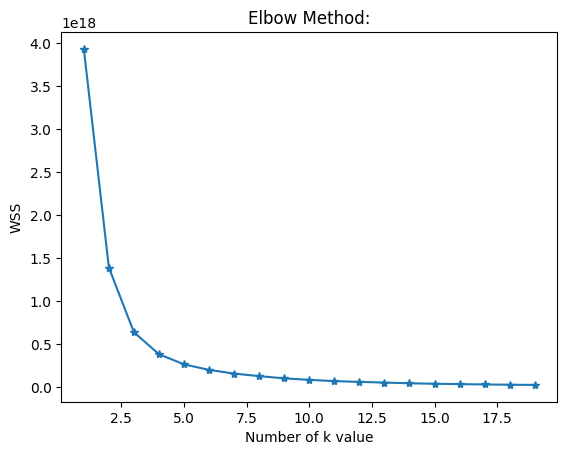

In [ ]:
plt.plot(range(1,20),wss,marker='*')
plt.xlabel('Number of k value')
plt.ylabel('WSS')
plt.title('Elbow Method:')
plt.show()

From graph we can see optimal value of k lies between 2.5 and 5.So we are considering k=4.

***Clustering using all features with optimal value of k=4***

In [ ]:
k_mean2 = KMeans(n_clusters=4)
k_mean2.fit(dataframe)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [ ]:
pred=k_mean2.predict(dataframe)
dataframe['label']=k_mean2.labels_
dataframe


,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,weak_foot,...,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,contribution_type,label
0,93,93,78000000.0,320000.0,34,170,72,73.0,1.0,4,...,35,24,6,11,15,14,8,42.0,1,1
1,92,92,119500000.0,270000.0,32,185,81,21.0,1.0,4,...,42,19,15,6,12,8,10,42.0,1,1
2,91,91,45000000.0,270000.0,36,187,83,11.0,1.0,4,...,32,24,7,11,15,14,11,42.0,1,3
3,91,91,129000000.0,270000.0,29,175,68,73.0,1.0,5,...,32,29,9,9,15,15,11,42.0,1,1
4,91,91,125500000.0,350000.0,30,181,70,10.0,1.0,5,...,65,53,15,13,5,10,13,42.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7767,51,64,140000.0,500.0,20,174,70,111629.0,1.0,3,...,23,25,15,10,8,15,5,42.0,1,0
7768,50,53,60000.0,500.0,25,179,70,1586.0,1.0,3,...,45,42,12,10,14,13,15,42.0,0,0
7769,50,60,100000.0,1000.0,21,175,65,111774.0,1.0,3,...,52,53,7,10,6,10,7,42.0,0,0
7770,49,55,70000.0,2000.0,22,184,77,112429.0,1.0,2,...,52,53,15,13,13,12,6,42.0,0,0


***We will find the optimal number of clusters, K using only features representing player stats or financial attributes.***

In [ ]:
wss=[]
for i in range(1,20):
  k_mean1 = KMeans(n_clusters=i)
  k_mean1.fit(Y)
  wss.append(k_mean1.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

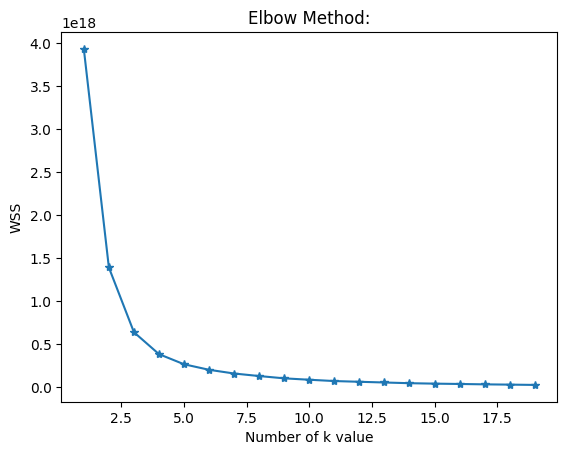

In [ ]:
plt.plot(range(1,20),wss,marker='*')
plt.xlabel('Number of k value')
plt.ylabel('WSS')
plt.title('Elbow Method:')
plt.show()

From graph we can see optimal value of k lies between 2.5 and 5.So we are considering k=4.



***Clustering using only features representing player stats or financial attributes with optimal value of k=4***

In [ ]:
k_mean4 = KMeans(n_clusters=4)
k_mean4.fit(Y)
pred=k_mean4.predict(Y)
Y['label']=k_mean4.labels_
Y

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-62-f84cb433f094>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y['label']=k_mean4.labels_


,value_eur,wage_eur,age,height_cm,weight_kg,league_level,weak_foot,skill_moves,international_reputation,release_clause_eur,...,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,contribution_type,label
0,78000000.0,320000.0,34,170,72,1.0,4,4,5,144300000.0,...,35,24,6,11,15,14,8,42.0,1,3
1,119500000.0,270000.0,32,185,81,1.0,4,4,5,197200000.0,...,42,19,15,6,12,8,10,42.0,1,3
2,45000000.0,270000.0,36,187,83,1.0,4,5,5,83300000.0,...,32,24,7,11,15,14,11,42.0,1,1
3,129000000.0,270000.0,29,175,68,1.0,5,5,5,238700000.0,...,32,29,9,9,15,15,11,42.0,1,3
4,125500000.0,350000.0,30,181,70,1.0,5,4,4,232200000.0,...,65,53,15,13,5,10,13,42.0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7767,140000.0,500.0,20,174,70,1.0,3,2,1,2300000.0,...,23,25,15,10,8,15,5,42.0,1,0
7768,60000.0,500.0,25,179,70,1.0,3,2,1,98000.0,...,45,42,12,10,14,13,15,42.0,0,0
7769,100000.0,1000.0,21,175,65,1.0,3,2,1,175000.0,...,52,53,7,10,6,10,7,42.0,0,0
7770,70000.0,2000.0,22,184,77,1.0,2,2,1,123000.0,...,52,53,15,13,13,12,6,42.0,0,0
